### Overview:
This Jupyter notebook begins by categorizing the three types of sheets involved in the House24 process: 
- PRESENTISMO
- DAILY EVOLUTION
- VITAL SIGNS

Various processes will be carried out to select the best files to initiate the subsequent training process through GCP Document AI services.

**Data Processing**: 

- Employing techniques to clean and standardize the patient data for further training, ensuring high-quality, reliable datasets are fed into our AI models. This process includes the removal of outliers, handling of missing values, normalization of data formats, and anonymization of patient information to uphold privacy standards.

In [3]:
import csv
import os

def list_files_in_csv(folder, output_file):
    """
    Generates a CSV file listing the names of all files in the specified folder.

    :param folder: Path of the folder from which the files will be listed.
    :param output_file: Path of the output CSV file.
    """
    files = os.listdir(folder)  # Lists the files in the folder
    files = [file for file in files if os.path.isfile(os.path.join(folder, file))]  # Filters only files, excluding folders

    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['File Name'])  # Writes the CSV header
        for file in files:
            writer.writerow([file])  # Writes the name of each file in a row

# Use the function with the desired folder and CSV output file
folder = r'C:\Users\HP\My Drive\Fractal AI\PROJECTS\Cloud Engenieering - House24 - Facturacion AI\h24_training_ml_model - page_classifier\training_data\signos_vitales'
output_file = r'C:\Users\HP\My Drive\Fractal AI\PROJECTS\Cloud Engenieering - House24 - Facturacion AI\h24_training_ml_model - page_classifier\training_data\signos_vitales\signal_training_data.csv'
list_files_in_csv(folder, output_file)


The following script organize **PDF files** into folders based on predefined categories determined by specific capital letters in the filenames, this will help to selec the best examples to train the model.

In [1]:
import os
import shutil

# Define the path to the directory containing the PDF files
input_directory = r'...\data_files'
# Define the base directory where categorized folders will be created
output_base_directory = r'...\data_files'

# List of categories
categories = ["CPAL", "PSICO", "PSIQ", "ECG", "FONO", "KINE", "T.O", "ENF", "CUI", "MED"]

# Ensure output base directory exists
if not os.path.exists(output_base_directory):
    os.makedirs(output_base_directory)

# Iterate over all files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.pdf'):
        # Check each category to find a match
        for category in categories:
            if category in filename:
                # Define the path to the category folder
                category_folder = os.path.join(output_base_directory, category)
                # Create the category folder if it does not exist
                if not os.path.exists(category_folder):
                    os.makedirs(category_folder)
                
                # Move the file to the category folder
                shutil.move(os.path.join(input_directory, filename), os.path.join(category_folder, filename))
                break  # Stop checking other categories once a match is found

print("Files have been organized.")


Files have been organized.


--------------------

**PDF Analysis for DataFrame Creation:** Analyzes PDFs to create a DataFrame with file names, number of pages, and sizes in MB, useful for document management.

In [84]:
import os
import fitz  # PyMuPDF
import pandas as pd

def analyze_pdfs(category_directory):
    """
    Analyzes PDF files in the specified directory.
    Returns a DataFrame with the file name, number of pages, and file size in MB.
    """
    # Initialize list to store data
    file_data = []

    # Iterate over each file in the directory
    for file in os.listdir(category_directory):
        if file.endswith('.pdf'):
            file_path = os.path.join(category_directory, file)
            
            # Open the PDF to get the number of pages
            with fitz.open(file_path) as doc:
                num_pages = len(doc)
            
            # Get the file size in bytes and convert it to MB
            file_size_bytes = os.path.getsize(file_path)
            file_size_mb = file_size_bytes / 1048576  # Convert bytes to MB
            
            # Add the data to the list
            file_data.append({
                'Name': file,
                'Number of Pages': num_pages,
                'File Size (MB)': file_size_mb
            })

    # Convert the list to DataFrame
    df = pd.DataFrame(file_data)

    # Optional: Round the file size to two decimals for better readability
    df['File Size (MB)'] = df['File Size (MB)'].round(2)

    return df

# Replace this with the directory of the specific category you want to analyze
category_directory = r'...\data_files\PSICO' #eg: ["CPAL", "PSICO", "PSIQ", "ECG", "FONO", "KINE", "T.O", "ENF", "CUI", "MED"]
df_files = analyze_pdfs(category_directory)

print(df_files)



                 Name  Number of Pages  File Size (MB)
0   Form10- PSICO.pdf                2            0.78
1   Form11- PSICO.pdf                2            0.64
2   Form12- PSICO.pdf                2            0.61
3   Form13- PSICO.pdf                2            0.92
4   Form14- PSICO.pdf                2            0.94
..                ...              ...             ...
59  Form67- PSICO.pdf                2            0.77
60   Form7- PSICO.pdf                2            0.93
61  Form76- PSICO.pdf                3            0.76
62   Form8- PSICO.pdf                2            0.97
63   Form9- PSICO.pdf                2            0.86

[64 rows x 3 columns]


**Data Distribution Visualization:** Generates statistics and visualizations for PDF page counts and sizes, aiding in understanding document distributions.

       Number of Pages  File Size (MB)
count        64.000000       64.000000
mean          2.015625        0.815937
std           0.125000        0.101914
min           2.000000        0.610000
25%           2.000000        0.747500
50%           2.000000        0.805000
75%           2.000000        0.902500
max           3.000000        0.990000


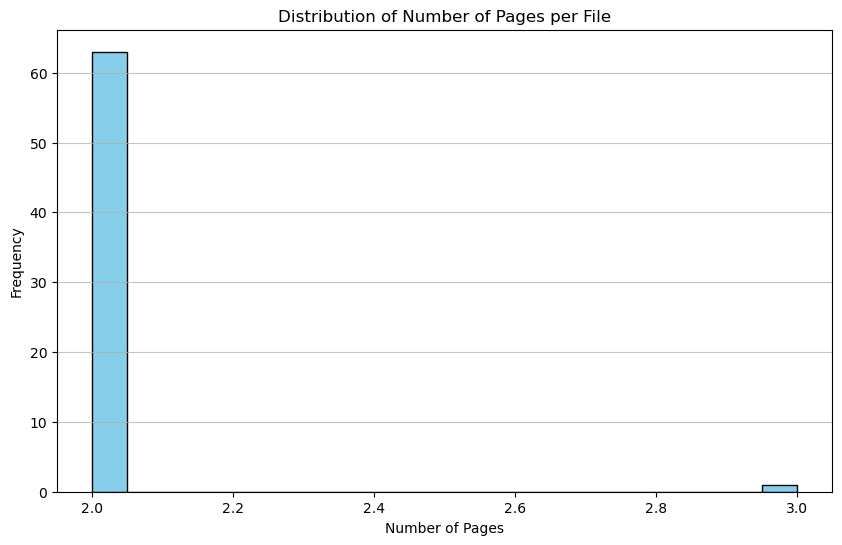

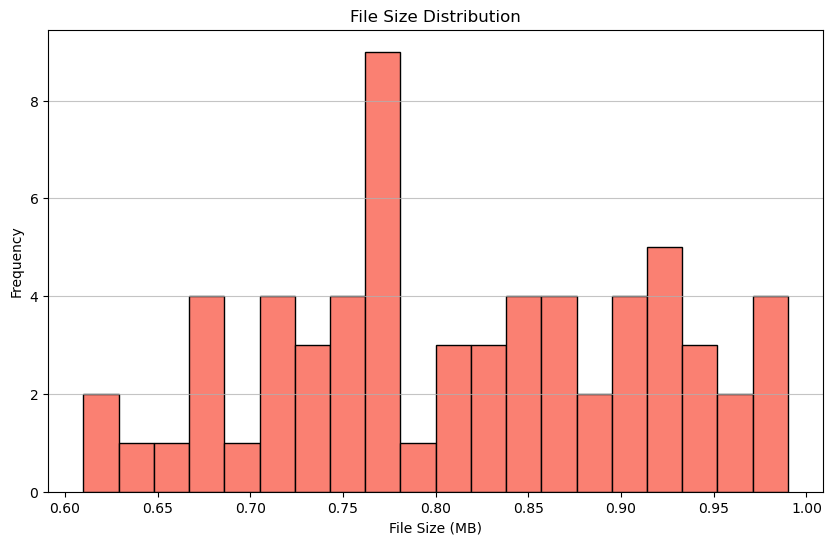

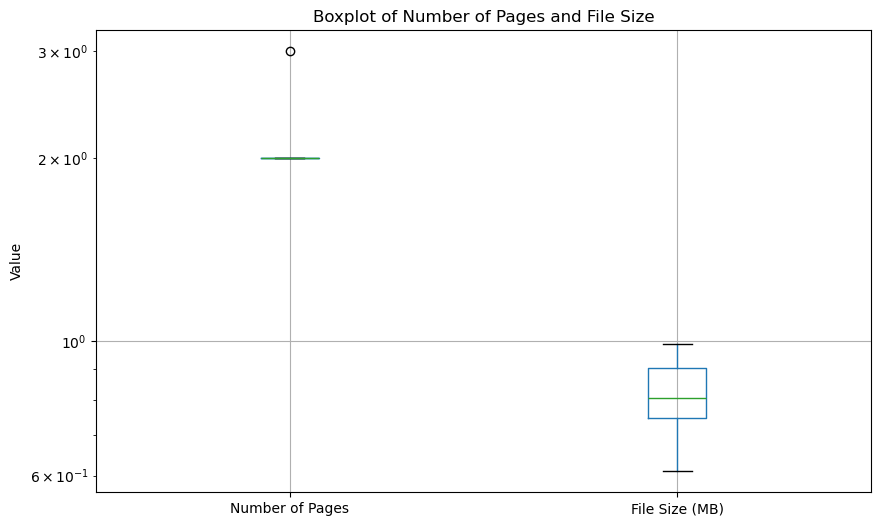

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df_files` is your DataFrame from the previous script

# Basic descriptive statistics
print(df_files.describe())

# Histogram for the number of pages
plt.figure(figsize=(10, 6))
plt.hist(df_files['Number of Pages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Pages per File')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram for the file size
plt.figure(figsize=(10, 6))
plt.hist(df_files['File Size (MB)'], bins=20, color='salmon', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (MB)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot to compare the distribution of both variables
plt.figure(figsize=(10, 6))
df_files.boxplot(column=['Number of Pages', 'File Size (MB)'])
plt.title('Boxplot of Number of Pages and File Size')
plt.ylabel('Value')
plt.yscale('log')  # Logarithmic scale to handle scale differences
plt.show()



**Selective File Deletion:** Deletes PDF files outside a specified page count range, streamlining data for processing or analysis.

In [82]:
import os
import fitz  # PyMuPDF
from tqdm import tqdm  # Import tqdm to show progress

def delete_files(directory, min_pages, max_pages):
    """
    Deletes PDF files in the specified directory that have fewer than min_pages or more than max_pages.
    """
    # List PDF files in the directory and wrap the iterator with tqdm to show progress
    pdf_files = [file for file in os.listdir(directory) if file.endswith('.pdf')]
    for file in tqdm(pdf_files, desc="Checking files"):
        file_path = os.path.join(directory, file)
        
        # Open the PDF to get the number of pages
        try:
            with fitz.open(file_path) as doc:
                num_pages = len(doc)
        except Exception as e:
            print(f"Error opening {file}: {e}")
            continue

        # Check if the file has fewer than min_pages or more than max_pages
        if num_pages < min_pages or num_pages > max_pages:
            print(f"Deleting {file}: it has {num_pages} pages, outside the allowed range.")
            os.remove(file_path)

# Example of usage:
directory = r'...\data_files\PSICO'  # Update this with the appropriate directory
min_pages = 2  # The minimum number of pages allowed
max_pages = 3  # The maximum number of pages allowed

delete_files(directory, min_pages, max_pages)



Checking files: 100%|██████████| 79/79 [00:00<00:00, 1161.56it/s]


In [83]:
import os
from tqdm import tqdm

def delete_files_by_size(directory, min_size_mb, max_size_mb):
    """
    Deletes files in the specified directory that are smaller than min_size_mb or larger than max_size_mb.
    """
    # Convert MB to bytes for comparison
    min_size_bytes = min_size_mb * 1048576
    max_size_bytes = max_size_mb * 1048576

    # List files in the directory
    files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]
    
    for file in tqdm(files, desc="Checking files"):
        file_path = os.path.join(directory, file)
        file_size = os.path.getsize(file_path)

        # Check if the file size is outside the allowed range
        if file_size < min_size_bytes or file_size > max_size_bytes:
            print(f"Deleting {file}: Size is {file_size / 1048576:.2f} MB, outside the allowed range.")
            os.remove(file_path)

# Example of usage:
directory = r'...\data_files\PSICO'  # Update this with the appropriate directory
min_size_mb = 0.60 # The minimum file size allowed in MB
max_size_mb = 1.0  # The maximum file size allowed in MB

delete_files_by_size(directory, min_size_mb, max_size_mb)


Checking files: 100%|██████████| 79/79 [00:00<00:00, 3832.94it/s]

Deleting Form1- PSICO.pdf: Size is 0.58 MB, outside the allowed range.
Deleting Form22- PSICO.pdf: Size is 1.08 MB, outside the allowed range.
Deleting Form28- PSICO.pdf: Size is 1.04 MB, outside the allowed range.
Deleting Form46- PSICO.pdf: Size is 1.07 MB, outside the allowed range.
Deleting Form68- PSICO.pdf: Size is 1.70 MB, outside the allowed range.
Deleting Form69- PSICO.pdf: Size is 2.52 MB, outside the allowed range.
Deleting Form70- PSICO.pdf: Size is 1.41 MB, outside the allowed range.
Deleting Form71- PSICO.pdf: Size is 0.21 MB, outside the allowed range.
Deleting Form72- PSICO.pdf: Size is 1.96 MB, outside the allowed range.
Deleting Form73- PSICO.pdf: Size is 1.58 MB, outside the allowed range.
Deleting Form74- PSICO.pdf: Size is 1.58 MB, outside the allowed range.
Deleting Form75- PSICO.pdf: Size is 1.32 MB, outside the allowed range.
Deleting Form77- PSICO.pdf: Size is 1.16 MB, outside the allowed range.
Deleting Form78- PSICO.pdf: Size is 1.35 MB, outside the allowed 

After applying the provided scripts for **PDF file analysis and cleanup** across various medical service categories, we achieved a significant optimization of our document collection. The process involved removing outdated or irrelevant files, leading to a more streamlined and focused dataset. Here's a summary of the changes:

**PSICO:** Reduced from 79 files to 64, a reduction of 19%.

**PSIQ:** Decreased from 45 files to 23, a 49% reduction.

**T.O:** Cut down from 226 files to 106, achieving a 53% reduction.

**KINE:** Initially at 2717 files, now at 1574, marking a 42% reduction.

**FONO:** Trimmed from 478 files to 333, a 30% reduction.

**MED:** Significantly reduced from 1825 files to 86, an astonishing 95% reduction.

**ENF:** Lowered from 2078 files to 1215, a 42% reduction.

**ECG:** Went from 28 files to 10, a 64% reduction.

**CUI:** Dropped from 676 files to 289, a 57% reduction.

The **CPAL** category was not utilized due to the files being considered old and irrelevant for the current needs.

------------------

**Metadata Analysis:** The following segmentation will be carried out through the metadata of each file. 

This script will loop through each PDF file in a specific directory, extract its metadata, and compile the information into a DataFrame. Note that PDF metadata typically includes title, author, creation date, modification date, and possibly other custom fields depending on how the PDF was created.

In [98]:
import os
import fitz  # PyMuPDF
import pandas as pd

def extract_pdf_metadata(directory):
    """
    Extract metadata from each PDF file in the specified directory and return it as a pandas DataFrame.
    """
    # Initialize a list to store metadata dictionaries
    metadata_list = []

    # Iterate over every file in the directory
    for file in os.listdir(directory):
        if file.endswith('.pdf'):
            file_path = os.path.join(directory, file)
            # Open the PDF file
            try:
                with fitz.open(file_path) as doc:
                    metadata = doc.metadata
                    # Add the file name to the metadata dictionary
                    metadata['file_name'] = file
                    metadata_list.append(metadata)
            except Exception as e:
                print(f"Error reading {file}: {e}")

    # Convert the list of dictionaries to a DataFrame
    metadata_df = pd.DataFrame(metadata_list)

    return metadata_df

# Specify the directory containing your PDF files
directory = r'...\data_files\ENF' # Update this with the appropriate directory

# Extract metadata and convert it to a DataFrame
metadata_df = extract_pdf_metadata(directory)

# Display the DataFrame
print(metadata_df)


       format                                    title      author  \
0     PDF 1.7              CamScanner 07-03-2022 22.17  CamScanner   
1     PDF 1.7                                                        
2     PDF 1.6                                                        
3     PDF 1.7                              bello nelly  CamScanner   
4     PDF 1.7                            bello nelly 2  CamScanner   
...       ...                                      ...         ...   
1210  PDF 1.7        FUNES EDELMA ENFERMERIA NOVIEMBRE  CamScanner   
1211  PDF 1.7  MONZON MARIA MABEL ENFERMERIA NOVIEMBRE  CamScanner   
1212  PDF 1.7              CamScanner 11-03-2022 13.32  CamScanner   
1213  PDF 1.7                           Lucia castillo  CamScanner   
1214  PDF 1.7                          Gomez eduardo-4  CamScanner   

                                      subject keywords  \
0                 CamScanner 07-03-2022 22.17            
1                                          

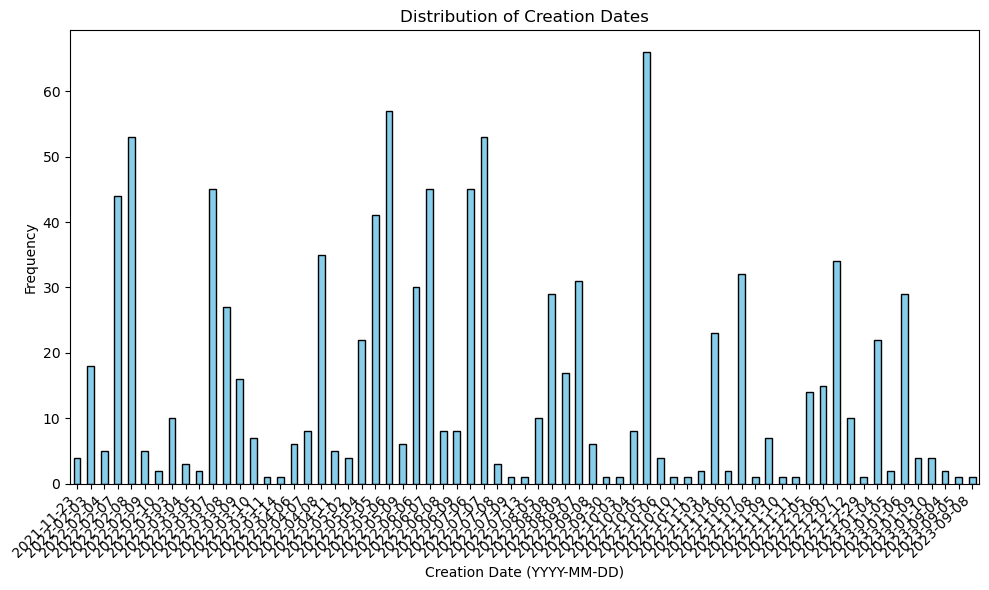

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `metadata_df` is your DataFrame and it contains a 'modDate' column

# Function to convert the PDF date format to YYYY-MM-DD
def convert_pdf_date(date_str):
    if date_str:
        date_str = date_str.replace("D:", "").replace("'", "")
        # Handle different date formats by checking length
        if len(date_str) >= 8:
            return f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"
    return None

# Apply the conversion function to each modDate entry
metadata_df['creationDate'] = metadata_df['creationDate'].apply(convert_pdf_date)

# Drop rows with None values in 'modDate' after conversion
metadata_df.dropna(subset=['creationDate'], inplace=True)

# Count occurrences of each unique modification date
date_distribution = metadata_df['creationDate'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
date_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Creation Dates')
plt.xlabel('Creation Date (YYYY-MM-DD)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()



It would seem that it is not the correct approach to reduce the dataset


The following analysis systematically explores PDF files across various directories, focusing on three key metrics: the total count of PDF files per directory, the average number of pages within these files, and the distribution of files based on page count. By iterating through each folder, it provides valuable insights into the composition and depth of the document repository, facilitating better understanding and management of the PDF documents within an organizational or project context.

In [100]:
import os
import fitz  # PyMuPDF
import pandas as pd

def analyze_folders(base_directory):
    """
    Analyzes folders under the base_directory to count files, calculate the mean pages per file,
    and analyze the distribution of files by page count.
    """
    results = []

    for root, dirs, files in os.walk(base_directory):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            page_counts = []

            # Iterate through each PDF in the directory
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.pdf'):
                    file_path = os.path.join(folder_path, file_name)
                    try:
                        with fitz.open(file_path) as doc:
                            page_counts.append(len(doc))
                    except Exception as e:
                        print(f"Error opening {file_name}: {e}")

            # Skip directories without PDF files
            if not page_counts:
                continue

            # Calculate statistics
            total_files = len(page_counts)
            mean_pages = sum(page_counts) / total_files if total_files else 0
            page_distribution = pd.Series(page_counts).value_counts().sort_index()

            results.append({
                'Directory': dir_name,
                'Total Files': total_files,
                'Mean Pages per File': mean_pages,
                'Page Distribution': page_distribution
            })

    return results

base_directory = r'...\ml_model - page_classifier\training_data'
folder_analysis = analyze_folders(base_directory)

# Example of how to display the results
for result in folder_analysis:
    print(f"Directory: {result['Directory']}")
    print(f"Total Files: {result['Total Files']}")
    print(f"Mean Pages per File: {result['Mean Pages per File']:.2f}")
    print("Page Distribution:")
    print(result['Page Distribution'])
    print("\n")


Directory: CPAL
Total Files: 9
Mean Pages per File: 4.89
Page Distribution:
1     1
3     4
4     2
7     1
16    1
Name: count, dtype: int64


Directory: CUI
Total Files: 289
Mean Pages per File: 3.82
Page Distribution:
2     11
3    105
4    108
5     55
6     10
Name: count, dtype: int64


Directory: ECG
Total Files: 10
Mean Pages per File: 2.00
Page Distribution:
2    10
Name: count, dtype: int64


Directory: ENF
Total Files: 1215
Mean Pages per File: 3.68
Page Distribution:
2     84
3    496
4    386
5    222
6     27
Name: count, dtype: int64


Directory: FONO
Total Files: 333
Mean Pages per File: 2.32
Page Distribution:
2    226
3    107
Name: count, dtype: int64


Directory: KINE
Total Files: 1574
Mean Pages per File: 2.53
Page Distribution:
2    735
3    839
Name: count, dtype: int64


Directory: MED
Total Files: 86
Mean Pages per File: 2.00
Page Distribution:
2    86
Name: count, dtype: int64


Directory: PEDIA
Total Files: 51
Mean Pages per File: 3.84
Page Distribution:
1   

These visualizations provide clear insights into the dataset's composition:

- **The first chart** shows the total number of PDF files in each directory, highlighting directories with the most content.

- **The second chart** depicts the average number of pages in files across directories, useful for understanding which directories contain longer documents on average.

- **The third chart**, as an example, illustrates the distribution of files by page count in the CUI directory, offering a detailed view of document length variation within a specific directory.

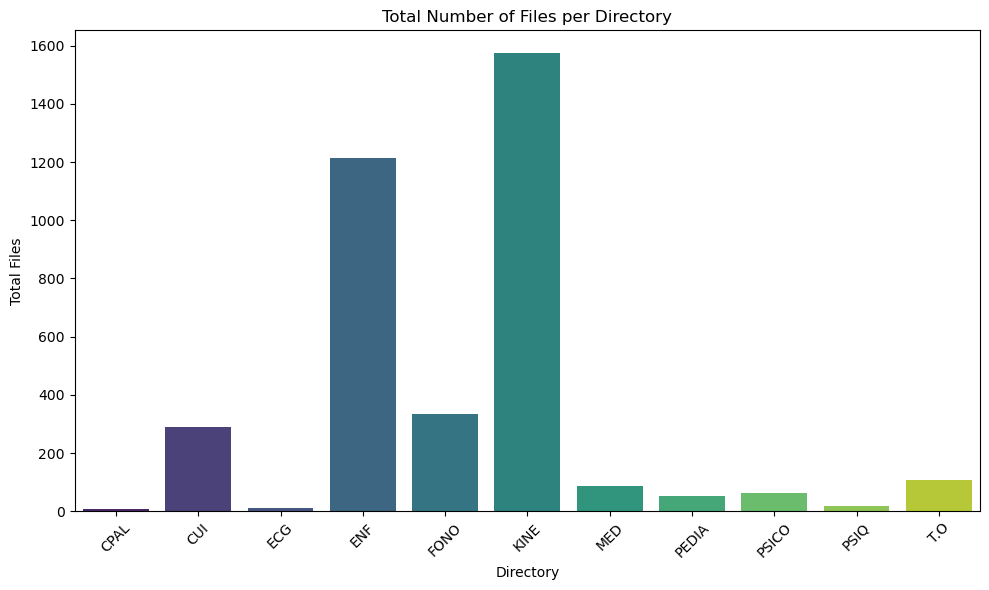

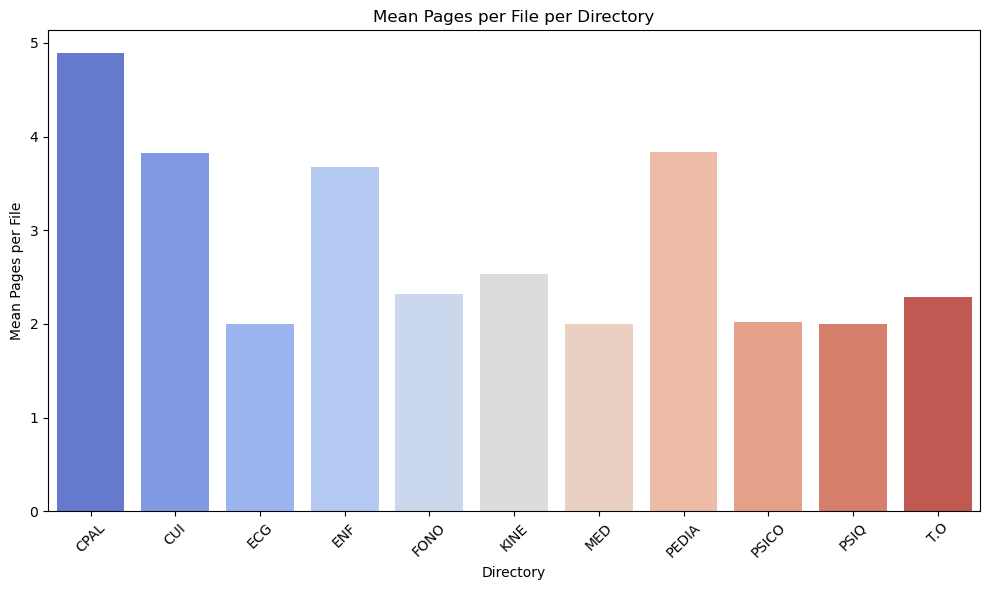

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Manually creating a DataFrame from the provided data
data = {
    'Directory': ['CPAL', 'CUI', 'ECG', 'ENF', 'FONO', 'KINE', 'MED', 'PEDIA', 'PSICO', 'PSIQ', 'T.O'],
    'Total Files': [9, 289, 10, 1215, 333, 1574, 86, 51, 64, 19, 106],
    'Mean Pages per File': [4.89, 3.82, 2.00, 3.68, 2.32, 2.53, 2.00, 3.84, 2.02, 2.00, 2.29]
}
df = pd.DataFrame(data)

# Plotting the total number of files per directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Directory', y='Total Files', palette='viridis')
plt.title('Total Number of Files per Directory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the mean pages per file per directory
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Directory', y='Mean Pages per File', palette='coolwarm')
plt.title('Mean Pages per File per Directory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This script is creating two bar plots using data from a DataFrame. The DataFrame contains information about different directories, including the total number of files and the mean pages per file for each directory.

- The first plot displays the total number of files per directory. It uses seaborn's barplot function to visualize this information. Each bar represents a directory, and the height of the bar corresponds to the total number of files in that directory.

- The second plot shows the mean pages per file for each directory. Again, it uses seaborn's barplot function to create the plot. Each bar represents a directory, and the height of the bar represents the average number of pages per file in that directory.
Both plots provide visual insights into the distribution of files and their sizes across different directories, helping to understand the data distribution and characteristics.

## Analysis of Training Data for Page Classifier Model

The dataset provided contains information about the files selected for training the page classifier model. This model aims to distinguish between different types of pages in medical records, particularly focusing on identifying "Presentism" pages from other types such as "Daily Evolution" and "Vital Signs" (in some cases).

The following observations can be made from the dataset:

- **File Categories and Distribution:** The files are categorized into various medical departments or specialties, such as CPAL, CUI, ECG, ENF, FONO, KINE, MED, PEDIA, PSICO, PSIQ, and T.O. Each category has a different number of files, ranging from a few files to hundreds or even thousands.

- **Number of Pages per File:** The number of pages varies significantly across different files within each category. Some files contain only one page, while others may have several pages, with the maximum number of pages reaching up to thousands.

**Conclusion:** After studying the composition and different distributions of the files that make up the dataset, I proceed to subdivide the different types of sheets found within each individual document. This will allow us to train the page classification model with GCP efficiently and quickly. 

Next, we continue with the division files process.

**Division Data Process**: At this part we spare the data, the following code is for categorizing pages of PDF files based on specific keywords found within the text content of each page using Optical Character Recognition (OCR). 

After categorizing the pages, it saves each page as a separate PDF file in corresponding folders based on their category.

In [ ]:
import fitz  # PyMuPDF for handling PDF files
import pytesseract  # OCR tool
from PIL import Image  # Handling image formats
import io
import os
from tqdm import tqdm  # Import tqdm for the progress bar

def categorize_pdf_pages(pdf_path, output_base_folder):
    """
    Reads a PDF file, categorizes each page based on specific keywords
    using OCR, and saves each page as a separate PDF in a corresponding
    folder based on its category.

    :param pdf_path: Path to the source PDF file.
    :param output_base_folder: Base folder where categorized page PDFs will be stored.
    """
    # Ensure the output base folder exists
    if not os.path.exists(output_base_folder):
        os.makedirs(output_base_folder)

    # Categories and their respective output folders
    categories = {
        'PRESENTISMO': 'presentismo',
        'EVOLUCION_DIARIA': 'evol_diaria',
        'SIGNOS_VITALES': 'signos_vitales'
    }

    # Ensure category folders exist
    for category in categories.values():
        category_path = os.path.join(output_base_folder, category)
        if not os.path.exists(category_path):
            os.makedirs(category_path)

    doc = fitz.open(pdf_path)

    # Process each page
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img_bytes = pix.tobytes("ppm")
        image = Image.open(io.BytesIO(img_bytes))
        text = pytesseract.image_to_string(image).upper()

        # Determine the category of the page
        page_category = None
        if "PRESENTISMO" in text:
            page_category = 'PRESENTISMO'
        elif "EVOLUCION DIARIA" in text:
            page_category = 'EVOLUCION_DIARIA'
        elif "SIGNOS VITALES" in text:
            page_category = 'SIGNOS_VITALES'

        # Save the page in the corresponding category folder
        if page_category:
            output_folder = os.path.join(output_base_folder, categories[page_category])
            output_pdf_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(pdf_path))[0]}_page_{page_num + 1}.pdf")
            page_pdf = fitz.open()
            page_pdf.new_page(width=pix.width, height=pix.height)
            page_pdf[0].insert_image(page_pdf[0].rect, stream=pix.tobytes())
            page_pdf.save(output_pdf_path)
            page_pdf.close()

    doc.close()

def process_all_pdfs_in_folder(folder_path, output_base_folder):
    """
    Processes all PDF files in a specified folder, categorizing each page
    and saving them in separate PDFs based on their content.

    :param folder_path: Path to the folder containing PDF files.
    :param output_base_folder: Path to the folder where categorized PDFs will be saved.
    """
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]
    for filename in tqdm(pdf_files, desc="Processing PDFs"):
        pdf_path = os.path.join(folder_path, filename)
        categorize_pdf_pages(pdf_path, output_base_folder)

# Paths
folder_path = r'...\training_data'
output_base_folder = r'...\segmented_data'

# Process all PDFs in the specified folder
process_all_pdfs_in_folder(folder_path, output_base_folder)